In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import chardet
import jieba

from PIL import Image
from collections import Counter
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator #词云库
from matplotlib.font_manager import *#如果想在图上显示中文，需导入这个包
from matplotlib import cm

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
path = 'messages2024.csv'

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.285 seconds.
Prefix dict has been built successfully.


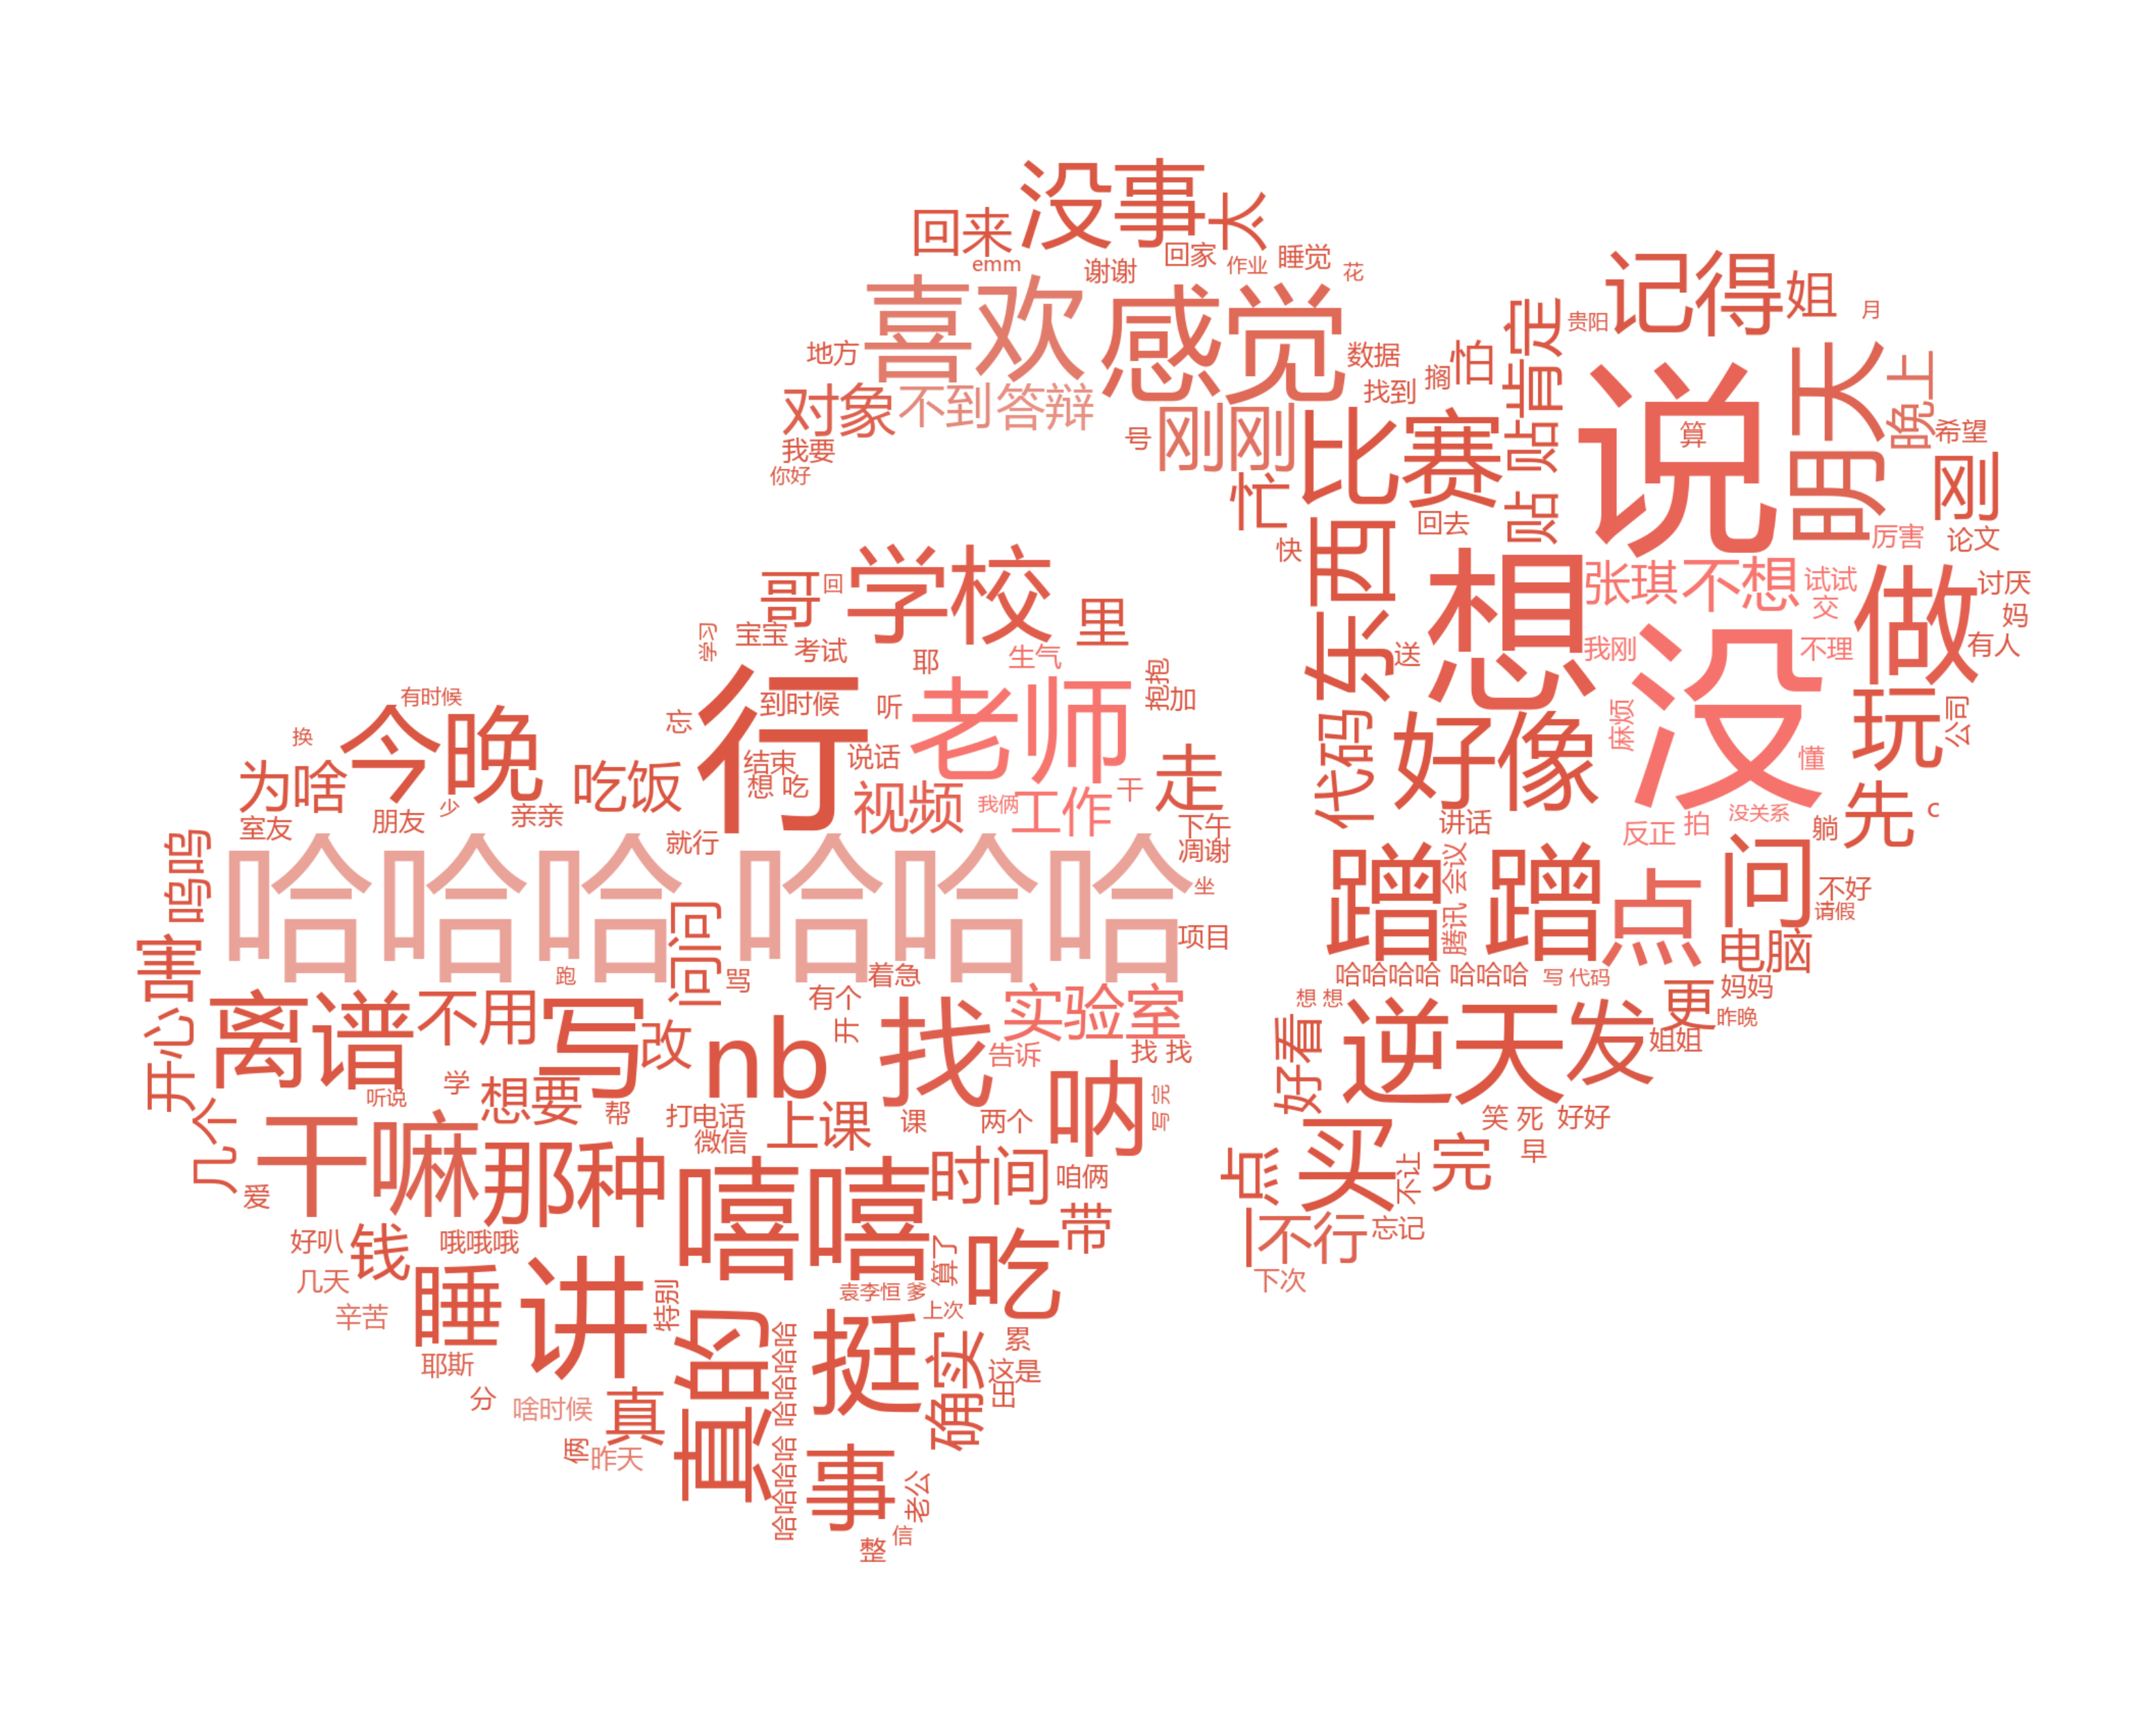

In [2]:

df = pd.read_csv(path, sep=',')
# df.to_excel('messages2024.xls')
# 使用指定的中文字体路径创建词云对象
font_path = 'C:/Windows/Fonts/msyh.ttc'  # 假设你已经下载了微软雅黑字体并知道其路径

# 筛选满足 Type == 1 且 IsSender == 1 的 StrContent
bobo_content = df[(df['Type'] == 1) & (df['IsSender'] == 1)]['StrContent']

# 指定保存的txt文件路径和名称
output_file_path = 'bobo_content.txt'

# 将筛选后的内容保存到txt文件中
bobo_content.to_csv(output_file_path, index=False, header=False, sep='\t')

with open('bobo_content.txt', 'r', encoding='utf-8') as file:
    bobo_text = file.read()

bobo_text = bobo_text.replace('[可怜]', '')
# 加载中文停用词
stopwords_path = "stopwords_cn.txt"
with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords_list = [line.strip() for line in f.readlines()]

# 将筛选后的内容分词
bobo_words = jieba.cut(bobo_text)

# 定义词云形状
mask_image_path = "heart_shape.png" #加载词云图的形状
mask_image = np.array(Image.open(mask_image_path))
img_colors = ImageColorGenerator(mask_image)

# 定义词云参数
wordcloud = WordCloud(
    font_path=font_path,
    min_font_size = 4,
    max_font_size = 100,
    margin = 2,
    scale = 2,
    random_state = 42,
    width=800,
    height=800,
    background_color='white',
    stopwords=stopwords_list,
    mask=mask_image,  # 使用自定义的图片作为词云的形状
    colormap='pink'   # 使用粉色调色板
).generate(' '.join([word for word in bobo_words if word not in stopwords_list]))

wordcloud.recolor(color_func=img_colors)

# 保存生成的词云图片
output_image_path = "bobo_wordcloud.png"
wordcloud.to_file(output_image_path)

# 显示词云
plt.figure(figsize=(40, 40))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

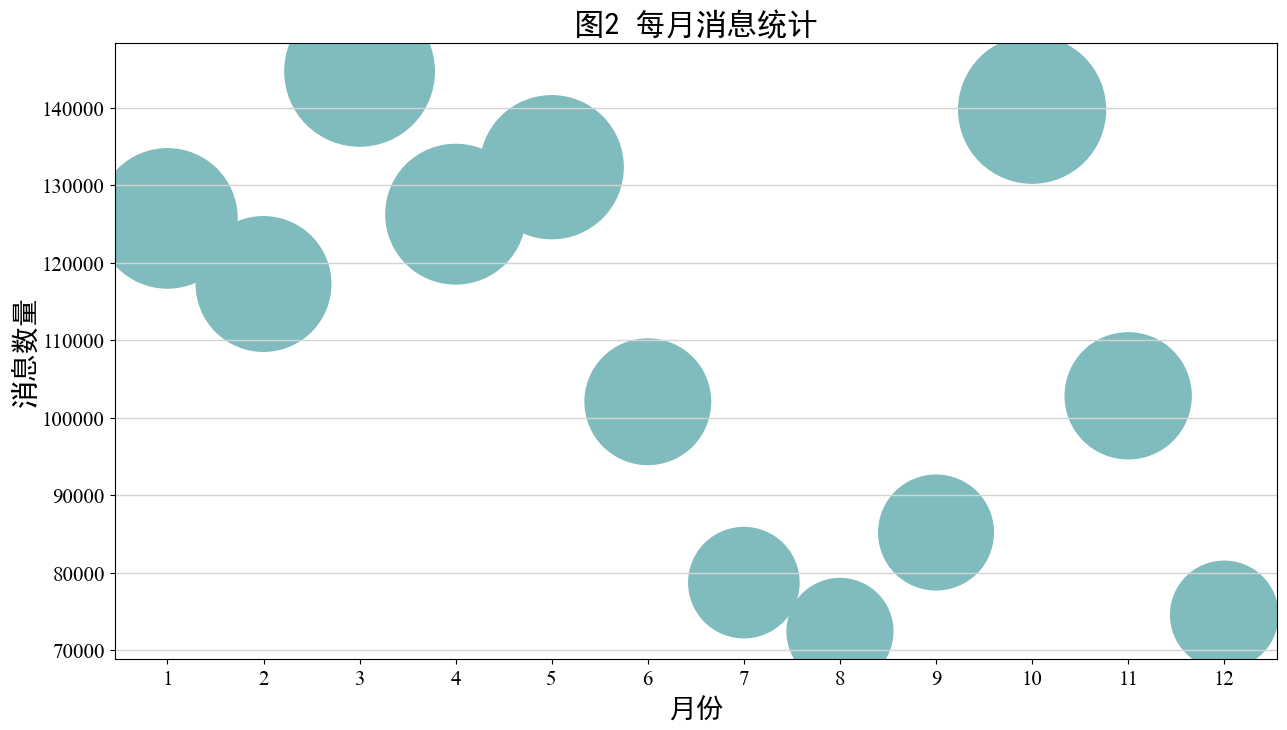

In [3]:
df2 = pd.read_csv(path, sep=',', usecols=[4,7,8])
df2['month'] = pd.to_datetime(df2['StrTime']).dt.month

month_counts = df2['month'].value_counts().sort_index()

scaled_sizes = month_counts * 0.08

# 绘制散点图
plt.figure(facecolor='white')

plt.title('图2 每月消息统计',fontsize=22)

plt.xlabel('月份',fontsize=20)
plt.ylabel('消息数量',fontsize=20)
plt.xticks(range(1, 13), fontname='Times New Roman',fontsize=15)
plt.yticks(fontname='Times New Roman',fontsize=15)

plt.scatter(month_counts.index, month_counts.values, color='#80BCBD', marker='o',s=scaled_sizes)

plt.grid(True, linestyle='solid', linewidth=1, color='lightgrey',axis='y')

fig = plt.gcf()
fig.set_size_inches(15,8)
fig.savefig('chat_month.png',dpi=100)
plt.show()

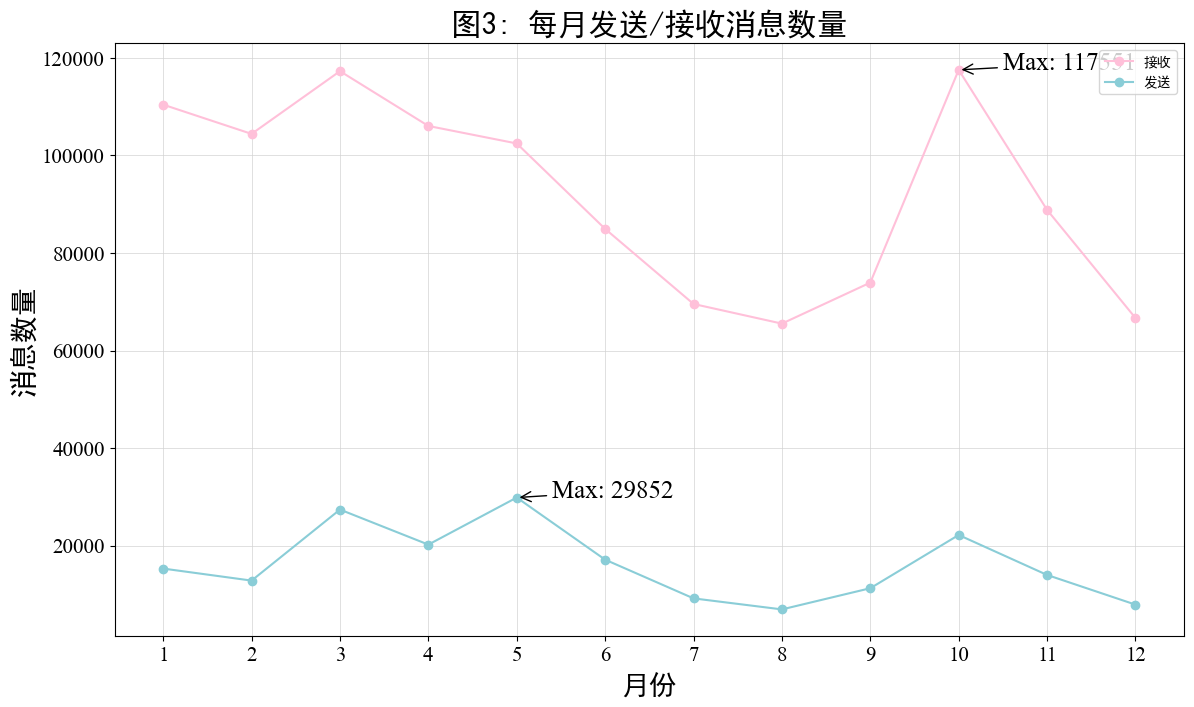

In [4]:
df2['month_bobo'] = pd.to_datetime(df2[df2['IsSender'] == 1]['StrTime']).dt.month
df2['month_pupu'] = pd.to_datetime(df2[df2['IsSender'] == 0]['StrTime']).dt.month

labels = ['接收', '发送']
colors = ['#FFC0D9', '#8ACDD7']

month_counts_bobo = df2['month_bobo'].value_counts().sort_index()
month_counts_pupu = df2['month_pupu'].value_counts().sort_index()

# 找到PUPU和BOBO每个月的最大值和对应的月份
max_bobo = month_counts_bobo.max()
max_month_bobo = month_counts_bobo.idxmax()

max_pupu = month_counts_pupu.max()
max_month_pupu = month_counts_pupu.idxmax()

month_counts_pupu.plot(kind='line', marker='o', label='接收',color='#FFC0D9')
month_counts_bobo.plot(kind='line', marker='o', label='发送',color='#8ACDD7')

# 在最高点上添加标签
plt.annotate(f'Max: {max_pupu}', xy=(max_month_pupu, max_pupu), xytext=(max_month_pupu + 0.5, max_pupu + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=18,fontname='Times New Roman')

plt.annotate(f'Max: {max_bobo}', xy=(max_month_bobo, max_bobo), xytext=(max_month_bobo + 0.4, max_bobo + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=18,fontname='Times New Roman')

plt.title('图3: 每月发送/接收消息数量',fontsize=22)

plt.xlabel('月份', fontsize=20)
plt.ylabel('消息数量',fontsize=20)
plt.xticks(range(1, 13), fontname='Times New Roman',fontsize=15)
plt.yticks(fontname='Times New Roman',fontsize=15)

plt.grid(True, linestyle='solid', linewidth=0.5, color='lightgrey')

font_prop = FontProperties(family='SimHei')
plt.legend(labels, loc="best",prop=font_prop)

plt.tight_layout()  # 优化布局，确保标签和标题不重叠

fig = plt.gcf()
fig.set_size_inches(15,8)
fig.savefig('chat_plot.png',dpi=100)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10800\2232864884.py:28: UserWarning: Glyph 25509 (\N{CJK UNIFIED IDEOGRAPH-63A5}) missing from current font.
  fig.savefig('chat_pie',dpi=100)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10800\2232864884.py:28: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.savefig('chat_pie',dpi=100)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10800\2232864884.py:28: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  fig.savefig('chat_pie',dpi=100)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10800\2232864884.py:28: UserWarning: Glyph 36865 (\N{CJK UNIFIED IDEOGRAPH-9001}) missing from current font.
  fig.savefig('chat_pie',dpi=100)
c:\Users\lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25509 (\N{CJK UNIFIED IDEOGRAPH-63A5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\

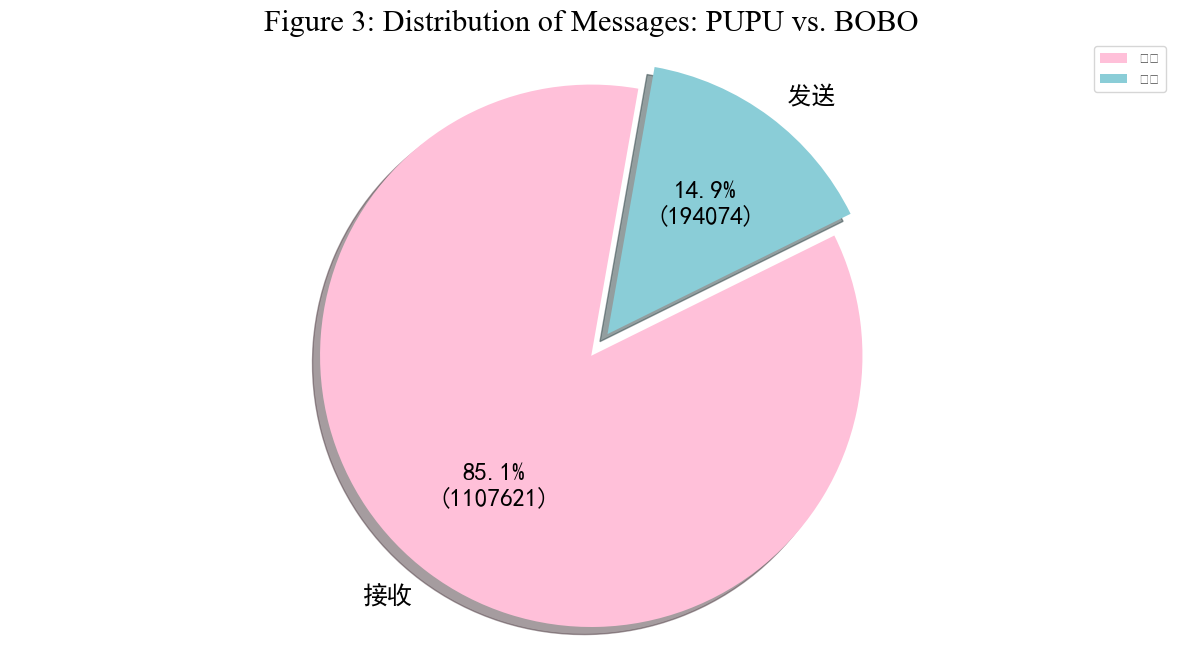

In [5]:
value_counts = df2['IsSender'].value_counts()

# 计算百分比
percentages = 100. * value_counts / value_counts.sum()

# 创建饼图
labels = ['接收', '发送']
colors = ['#FFC0D9', '#8ACDD7']
explode = (0.1, 0)  # 突出显示第一个切片

plt.figure(figsize=(8, 8))

# 定义格式化函数，用于在饼图内部显示数据
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(value_counts, explode=explode, labels=labels, colors=colors, 
        autopct=lambda pct: func(pct, value_counts), shadow=True, startangle=80, textprops={'style':'italic' , 'fontsize': 18})

plt.title('Figure 3: Distribution of Messages: PUPU vs. BOBO', fontname='Times New Roman',fontsize=22)
font_prop = FontProperties(family='Times New Roman')
plt.legend(labels, loc="best",prop=font_prop)
plt.axis('equal')  # 使饼图保持圆形

fig = plt.gcf()
fig.set_size_inches(15,8)
fig.savefig('chat_pie',dpi=100)
plt.show()

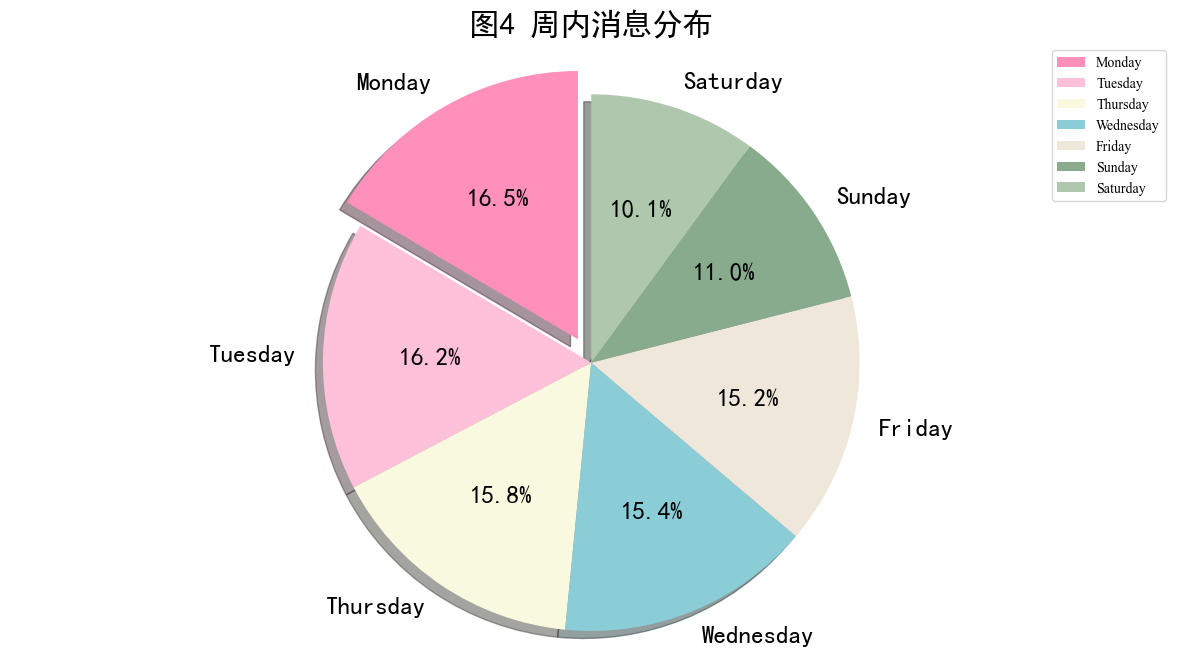

In [6]:
dates = pd.to_datetime(df2['StrTime'])
weekdays = dates.dt.day_name()

weekday_counts = weekdays.value_counts()

# 绘制饼图

colors = ['#FF90BC', '#FFC0D9', '#F9F9E0', '#8ACDD7', '#EEE7DA', '#88AB8E', '#AFC8AD']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # 突出显示第一个切片
plt.figure(figsize=(8, 8))

plt.pie(weekday_counts, explode=explode, labels=weekday_counts.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 18})
plt.title('图4 周内消息分布',fontsize=22)
font_prop = FontProperties(family='Times New Roman')
plt.legend(labels=weekday_counts.index, loc="best",prop=font_prop)
plt.axis('equal')  # 使饼图保持圆形

fig = plt.gcf()
fig.set_size_inches(15,8)
fig.savefig('chat_pie_2',dpi=100)
plt.show()

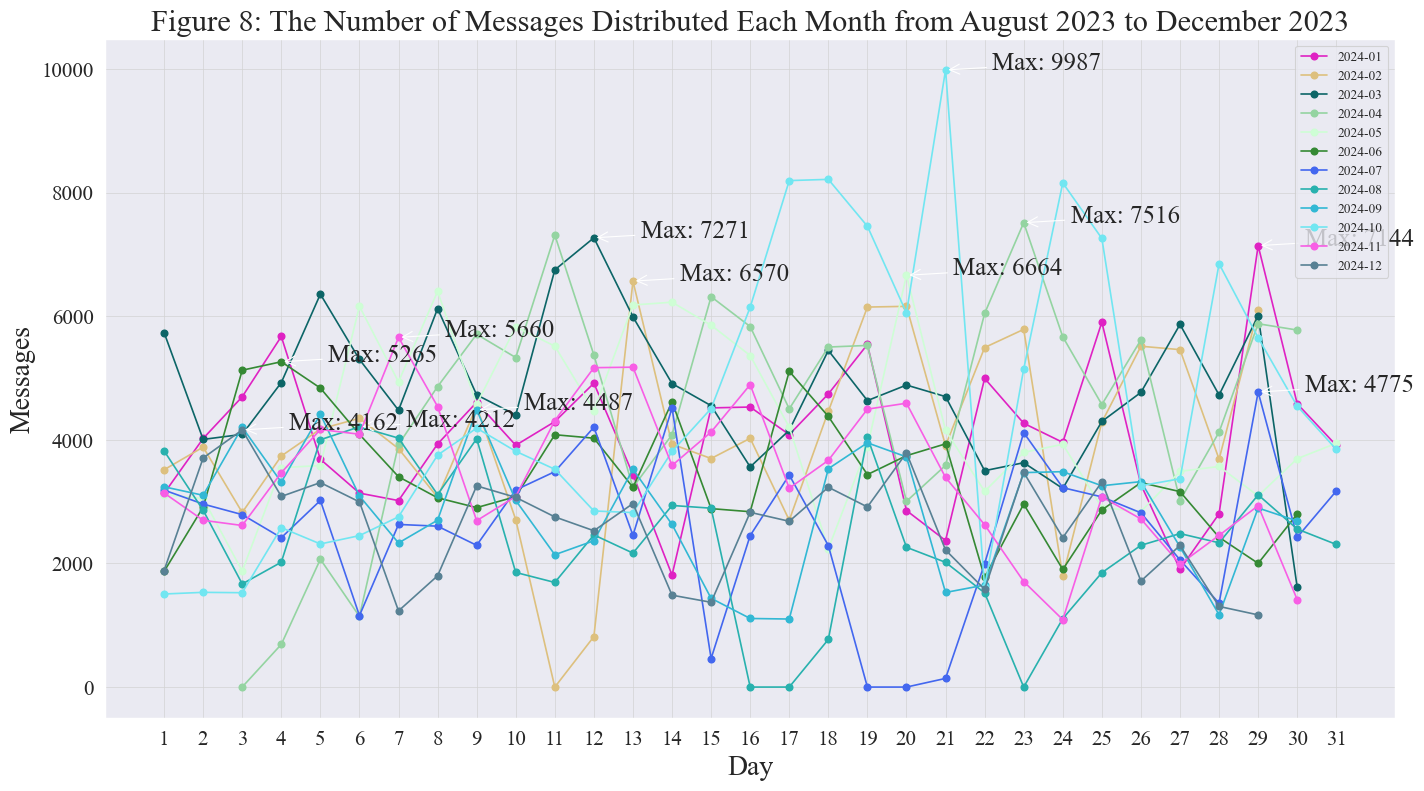

In [11]:
# 将 'Date' 列转换为 datetime 类型
df2['Date'] = pd.to_datetime(df2['StrTime'])

df2.set_index('Date', inplace=True)

# 创建一个包含每月统计数据的字典
monthly_counts = {}

# 对每个月的 DataFrame 进行处理
for month in range(1, 13):
    month_str = f'2024-{month:02d}'
    month_df = df2.loc[month_str]
    
    # 按每天统计数量
    daily_count = month_df.resample('D').size()
    
    # 存储在字典中
    monthly_counts[month_str] = daily_count

# 绘制五条折线图
plt.figure(figsize=(12, 8))

# 添加标题和标签
# labels = ['2023-08', '2023-09', '2023-10', '2023-11', '2023-12']
labels = [f'2024-{month:02d}' for month in range(1, 13)]
# 随机生成颜色列表
import random
colors = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(len(monthly_counts))]
# colors = ['#88AB8E', '#FF9843', '#3468C0', '#D63484', '#402B3A']

for idx, (month, count_data) in enumerate(monthly_counts.items()):
    plt.plot(count_data.index.day, count_data.values, marker='o', linestyle='-', color=colors[idx], label=month)
    
    # 找到最大值和对应的索引
    max_value = count_data.max()
    max_day = count_data.idxmax().day  # 获取最大值对应的日期
    
    # 在图上标注最大值
    plt.annotate(f'Max: {max_value}', xy=(max_day, max_value), xytext=(max_day + 1.2, max_value + 1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=18, fontname='Times New Roman')

plt.title('Figure 8: The Number of Messages Distributed Each Month from August 2023 to December 2023', fontname='Times New Roman',fontsize=22)
plt.xlabel('Day', fontname='Times New Roman',fontsize=20)
plt.ylabel('Messages', fontname='Times New Roman',fontsize=20)
plt.xticks(range(1, 32),fontname='Times New Roman',fontsize=15)  # 设置x轴标签
plt.yticks(fontname='Times New Roman',fontsize=15)
font_prop = FontProperties(family='Times New Roman')
plt.legend(labels, loc="best",prop=font_prop)
plt.grid(True, linestyle='solid', linewidth=0.5, color='lightgrey')  # 添加网格线

plt.tight_layout()

fig = plt.gcf()
fig.set_size_inches(15,8)
fig.savefig('chat_plot_2.png',dpi=100)
plt.show()

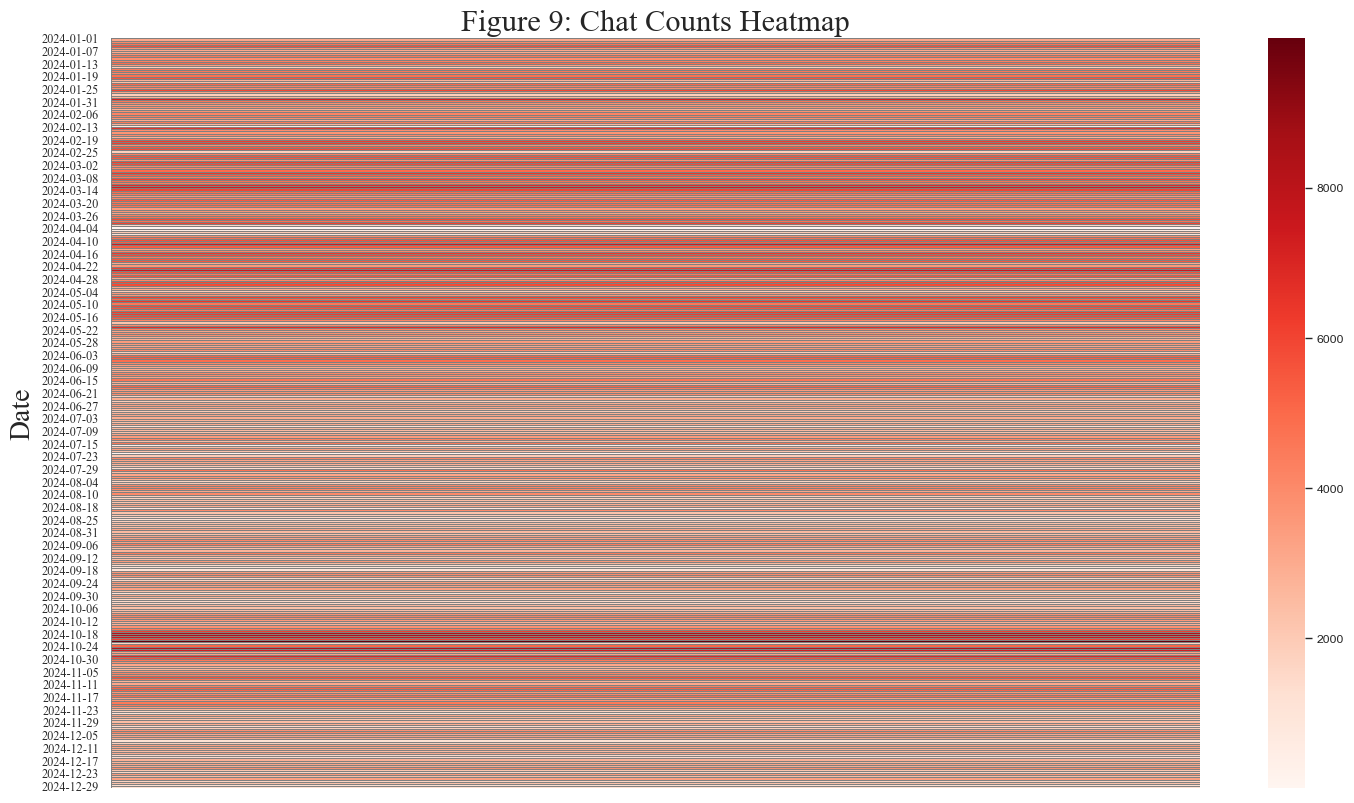

In [12]:
df2['Date'] = pd.to_datetime(df2['StrTime']).dt.date

# 统计每天的聊天数目
daily_counts = df2['Date'].value_counts().reset_index()
daily_counts.columns = ['Date', 'Chat_Count']

# 为了制作热力图，我们可能需要将日期进行重塑以创建一个矩阵。
# 使用pivot_table创建矩阵
heatmap_data = daily_counts.pivot_table(index='Date', values='Chat_Count', aggfunc='sum')

# 使用seaborn绘制热力图
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="Reds",linewidths=0.5, linecolor='gray',xticklabels=False)

plt.title('Figure 9: Chat Counts Heatmap', fontname='Times New Roman',fontsize=22)
plt.ylabel('Date', fontname='Times New Roman',fontsize=20)
plt.yticks(fontname='Times New Roman')

plt.tight_layout()

fig = plt.gcf()
fig.set_size_inches(15,8)
fig.savefig('heatmap_1.png',dpi=100)
plt.show()

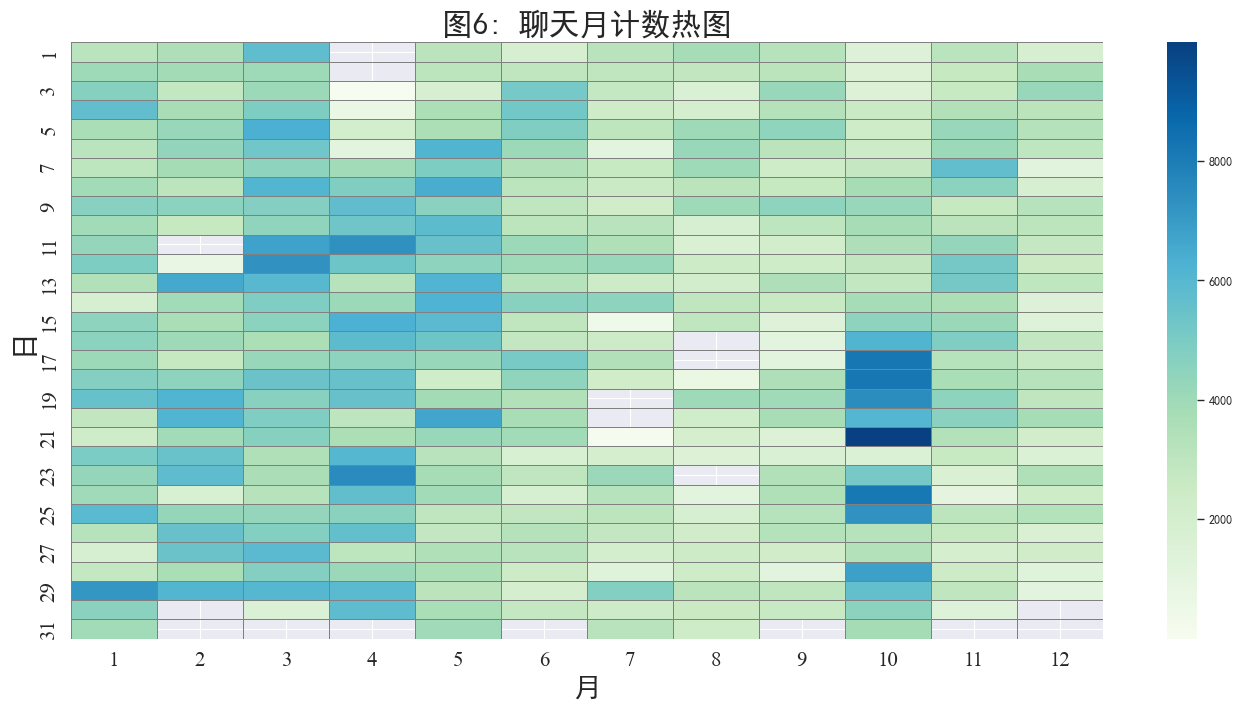

In [13]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df2['Date'] = pd.to_datetime(df2['StrTime'])
df2['Month'] = df2['Date'].dt.month  # 提取月份



# 使用pivot_table创建矩阵，按月份和日期
heatmap_data = df2.pivot_table(index=df2['Date'].dt.day, columns='Month', values='StrTime', aggfunc='count')

# 使用seaborn绘制热力图
sns.heatmap(heatmap_data, cmap="GnBu", linewidths=0.5, linecolor='gray')

plt.title('图6: 聊天月计数热图',fontsize=22)
plt.xlabel('月', fontsize=20)
plt.ylabel('日', fontsize=20)
plt.xticks(fontname='Times New Roman',fontsize=15)  # 设置x轴标签
plt.yticks(fontname='Times New Roman',fontsize=15)
plt.tight_layout()

fig = plt.gcf()
fig.set_size_inches(15,8)
fig.savefig('heatmap_2.png',dpi=100)


plt.show()





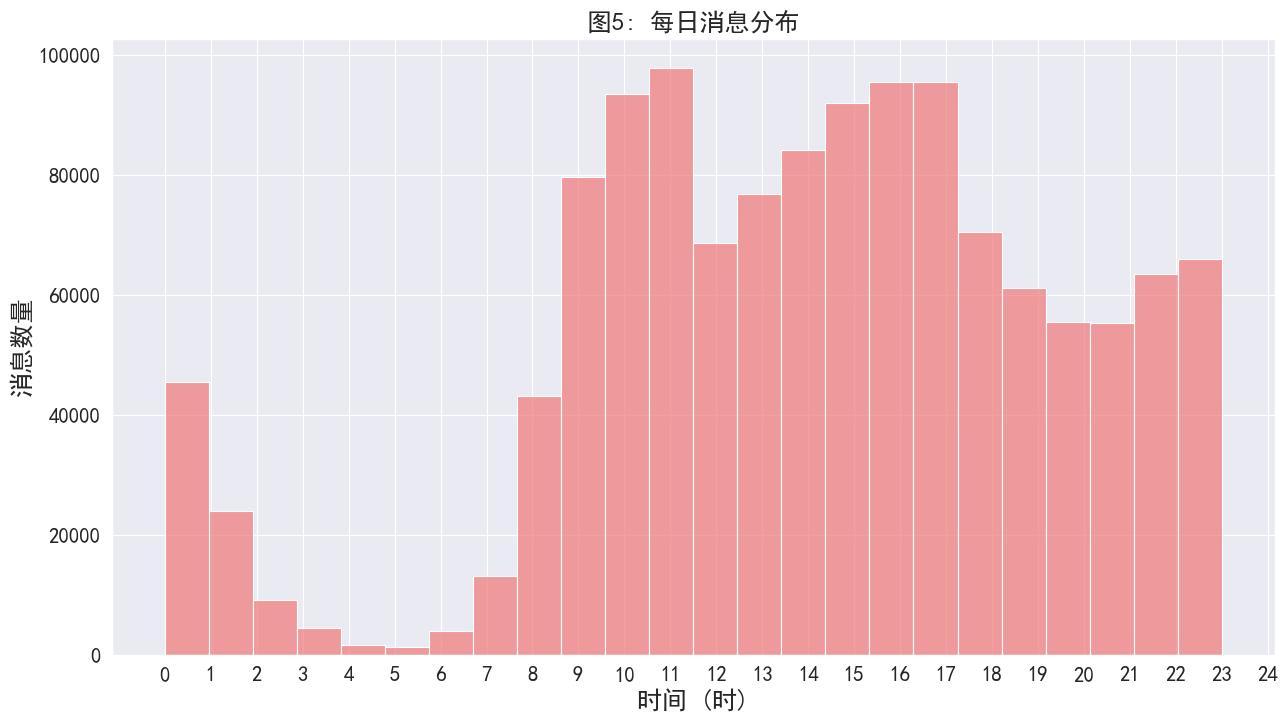

In [14]:
# sns.set_style('darkgrid')#设置图片为深色背景且有网格线
# sns.set_context("talk")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

sns.histplot(df2['hour'],bins=24,kde=False, color='lightcoral')

plt.title('图5: 每日消息分布',fontsize=18)
plt.xlabel('时间 (时)',fontsize=18)
plt.ylabel('消息数量',fontsize=18)

plt.xticks(np.arange(0, 25, 1.0),fontsize=15)
plt.yticks(fontsize=15)

fig = plt.gcf()
fig.set_size_inches(15,8)
fig.savefig('chat_time.png',dpi=100)
plt.show()